                                             Workshop 4: Dragos Gruia and Valentina Giunchiglia

# Introduction to structural and functional MRI analysis in Python

The aim of the lecture of today is to introduce you to the analysis of structural and functional MRI data using Python. You should know this by now thanks to the introductory lecture, but essentially the fundamental difference between structural and functional MRI is the following:

- **Structural MRI**: provides information about the anatomy and pathology of the brain
- **Functional MRI**: provides information about the brain activity

In the workshop of today, we will teach you how to manage and understand these imaging data, and how to conduct some basic analysis. 


The data for the lecture of today are saved in the format of a `pickle` object. Pickle is a module in python that can be used to store and save python objects, in the `pickle` format. The first thing you need to do is to import the module, together with other modules you will need in the workshop.

In [60]:
import scipy.io
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import numpy as np

To open and save python objects in the pickle format, you need to use `context managers`, which you should have learnt during the first lecture of the primer material. Let's start by loading the fMRI (functional MRI) and sMRI (structural MRI) data.

In [3]:
with open('Data/fmri_day4.pickle', 'rb') as handle:
    fmri = pickle.load(handle)
    
with open('Data/smri_day4.pickle', 'rb') as handle:
    smri = pickle.load(handle)

## Visualize and understand sMRI data

Let's start by looking at the sMRI data. The first thing we can do is to check out the shape and type of the object.

In [19]:
smri.shape, type(smri)

((256, 256, 54), numpy.ndarray)

As you can see `smri` is a 3 dimensional array, with dimensions 256, 256 and 54. The reason why we have 3D is that the brain is in 3D! When we represent and study the brain, we can consider it in terms of **voxels**. Voxels represent a tiny cube of brain tissue and correspond to the smallest piece you can split a brain into. To understand better, look at the following figure. Each one of these small cube is a voxel. If you want to specify the exact location of the voxel in the brain, since it is in 3D, you have to provide the x, y and z coordinates, which correspond to the 3 dimensions of your array. 

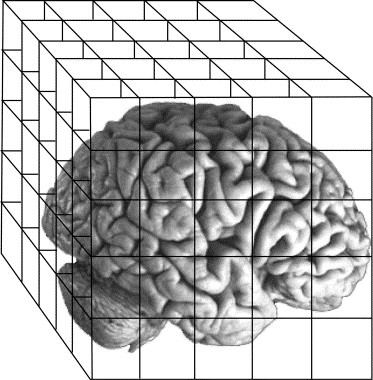

**What are these dimensions?**

You can imagine that the brain is made up of multible brain slices. Each one of these brain slices is a 2D plane. This is where the x and y dimension come from, which tell you where in the plane the voxel is located. If you put all these separate slices together, you get the 3D brain. The z dimension specifies to which slice of the brain the voxel belongs.

The values of the array represent the signal of each voxel, the higher is the number, the stronger is the signal. In Python, if you want to extract the signal of a specific voxel, you have to provide exact x, y and z coordinates. Let's try to extract the signal in x=100, y=100 and z=10.

In [46]:
smri[100, 100, 10]

832.0

You always have to provide the x, y and z coordinates in this order.

Now try to change the values to x = 20, y = 20 and z = 10. Why do you think that is the result you get?

In [7]:
# CODE HERE

When we think about sMRI images, however, we are more interested in extracting collection of voxels, maybe a 2D brain slide or a 1D set of voxels. 
If you want to extract all voxels along the x axis, then you have to select all values in x. If you remember from the primer, you can do that by using `:`.

In [45]:
smri[:, 100, 10]

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,   40.,   40.,   24.,    8.,
         40.,    8.,   40.,   24.,    0.,   40.,   32.,   32.,    0.,
         16.,   40.,   24.,   24.,   32.,   56.,   40.,  216.,  808.,
        944.,  776.,  768.,  664.,  480.,  288.,  176.,  440.,  712.,
        720.,  776.,  840.,  736.,  312.,   40.,   32.,   56.,   72.,
        120.,  320.,  464.,  416.,  344.,  464.,  536.,  384.,  296.,
        544.,  608.,  576.,  672.,  624.,  552.,  624.,  624.,  600.,
        720.,  760.,  768.,  824.,  824.,  792.,  792.,  840.,  832.,
        848.,  832.,  832.,  864.,  880.,  896.,  888.,  920.,  944.,
        920.,  920.,  920.,  936.,  928.,  888.,  912.,  904.,  920.,
        872.,  816.,  856.,  808.,  728.,  712.,  736.,  712.,  536.,
        472.,  520.,

How should you change the code to extract all values along the y axis, and the z axis?
Try to check the shapes of these arrays. Is it as you expect it? Why?

In [40]:
# CODE HERE


Now let's try to extract an entire brain slice in 2D. When you look at the brain, you can think of three possible planes: sagittal, coronal and axial, as shown in the Figure. 
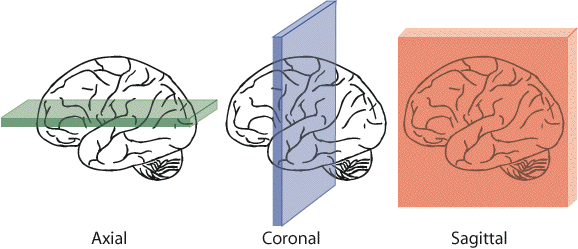

Let's try to visualize these planes in our images. To visualize 2D arrays in python, matplotlib has a ready to use function called  `imshow ` that takes as an argument the 2D array, together with additional arguments about, for example, the colour map to use (`cmap`)

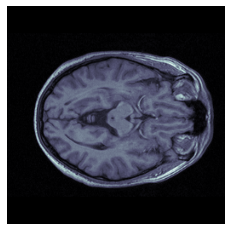

In [107]:
plt.imshow(smri[:,:,20], cmap='bone')
_ = plt.axis("off")

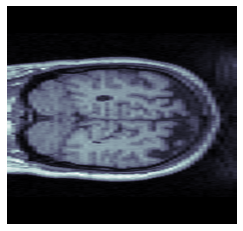

In [108]:
plt.imshow(smri[:,80,:], cmap='bone', aspect=0.2)
_ = plt.axis("off")

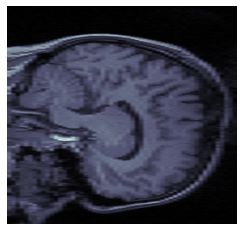

In [112]:
plt.imshow(smri[120,:,:], cmap='bone', aspect=0.2)
_ = plt.axis("off")

Can you understand which plane each image represents?

-------
### Code here

Let's try to see what happens if you change the coordinate number along one of the planes of your choice. Plot a figure with 6 suplots where each suplot represents a 2D section of the brain at different coordinates.
Tips: 
1. You can use enumerate
2. You have to change BOTH the subplot number and the coordinate

In [106]:
## Code here


------

## Visualize and understand fMRI data

Let's start by looking at the shape of fMRI data. How is it different from sMRI?

In [113]:
fmri.shape

(16, 16, 16, 96)

As you can see, fMRI data are 4 dimensional arrays. The first three dimensions are the same as sMRI. The fourth dimension is **time**. As we mentioned at the beginning of the tutorial, fMRI measures brain activity. There are two possible types of fMRI: **task** and **resting state** fMRI. Task fMRI measures brain activity while participants are completing a task, instead resting state fMRI studies changes in the brain while participants are at rest. Since fMRI measures changes in time, it is necessary to take multiple images of the brain throughout time. Since the fourth dimension is equal to 96, it means that our data contains 96 3D images of the brain, collected at 96 following times.

An easy way to visualize the timecourse, or change in voxel signal, throughout time is to plot it. To do it, you have to select specific x, y and z coordinates (that specify which voxel you want to look at), and then keep all the values in the time dimension, which means that you are looking at the signal value of the x,y,z voxel throughout time.

Text(0, 0.5, 'Signal')

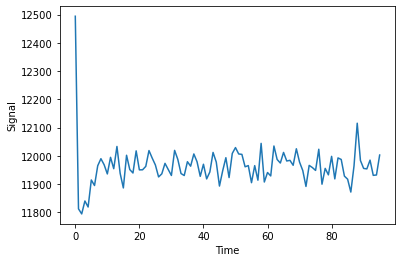

In [126]:
_ = plt.plot(fmri[8,8,8,:])
plt.xlabel("Time")
plt.ylabel("Signal")

The signal you are observing shows how the activity of a specific voxel changes throughout time. However, it is not only that. Indeed, fMRI is highly affected by noise. Noise can be introduced due to multiple reasons, such as motion. The head movement, as well as the simple movement caused by the heart beating, introduce noise in the fMRI signal. Correcting for this noise is important when you do some analysis!

It is possible to plot the timecourse of different voxels in one plot, by simply writing multiple plot commands one after the other.

Text(0, 0.5, 'Signal')

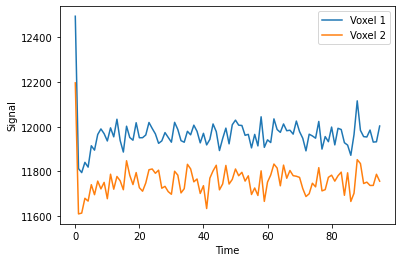

In [123]:
_ = plt.plot(fmri[8,8,8,:], label = "Voxel 1")
_ = plt.plot(fmri[8,9,8,:], label = "Voxel 2")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Signal")

-------
### Code here

Now let's try to combine what you learnt before. Create a figure that represents how an axial view of the brain changes throughout time.

Tips: 
1. You can use enumerate
2. You have to change BOTH the subplot number and the coordinate

In [106]:
## Code here


------

## Functional connectivity analysis

Apart from plotting the timecourses, you can also plot a scatterplot to observe whether the timecourse of two voxels is correlated. This is important because if the signal of two voxels is correlated, it might mean that the brain acitivity of one of the regions depends one the activity of the other region.

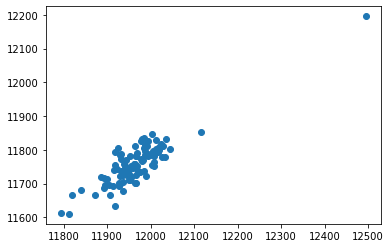

In [219]:
_ = plt.scatter(fmri[8,8,8,:], fmri[8,9,8,:])

**Functional connectivity** describes how the timecourse of two brain regions statistically depend on each other. To measure this statistical dependency, we can calculate the correlation between the timecourses of two separate voxels. Let's try to select two voxels and calculate their correlation.

In [153]:
voxel1 = fmri[13,8,9,:]
voxel2 = fmri[10,3,9,:]

In [160]:
np.corrcoef(voxel1, voxel2)

array([[1.        , 0.63143795],
       [0.63143795, 1.        ]])

The output of the function is the correlation coefficient **R**. Since the ouput is a diagonal matrix, to extract the correlation coefficient, you can extract the second element of the first array, or the first element of the second array.

In [168]:
np.corrcoef(voxel1, voxel2)[0][1]

0.6314379526141777

 As you should already know, the correlation coefficient can have any value between -1 and 1. The closer is the value to -1 or 1, the more linear is the relationship between the two timecourses. The greater is the absolute value, the stronger is the relationship. A positive coefficient indicates that when the signal of one voxel increases, the signal of the other voxels also tends to increase. Instead, a negative coefficient means that when the signal of one voxel increases, the signal of the other voxel tends to decrease. In this case, there is a moderate, positive, correlation between the two selected voxels, which means that the two voxels appear to have similar timecourses.

However, to be able to interpret what this actually means, it is important to understand where the voxels are located in the brain. It is possible to do this by simply creating a copy of your original fmri image and replacing the value of the voxel of interest with a 0. In this way, you will be easily able to see where the voxel is when you create a plot, because the voxel will be completely black.

**IMPORTANT**: you must create a copy of the image, or you will lose the real signal information of the voxel you are studying. You should use the copy ONLY for visualization purposes and not for the analysis.

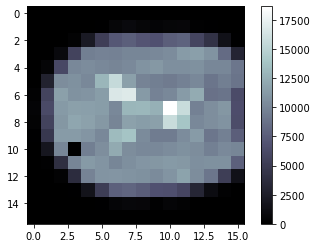

In [185]:
fmriview = fmri.copy()
fmriview[10,3,9,1] = 0
plt.imshow(fmriview[:, :, 9, 1], cmap = "bone")
plt.colorbar()

As you can see the voxel is more or less located in the visual occipital cortex. As a reference, you can use the following (or any other) figure.

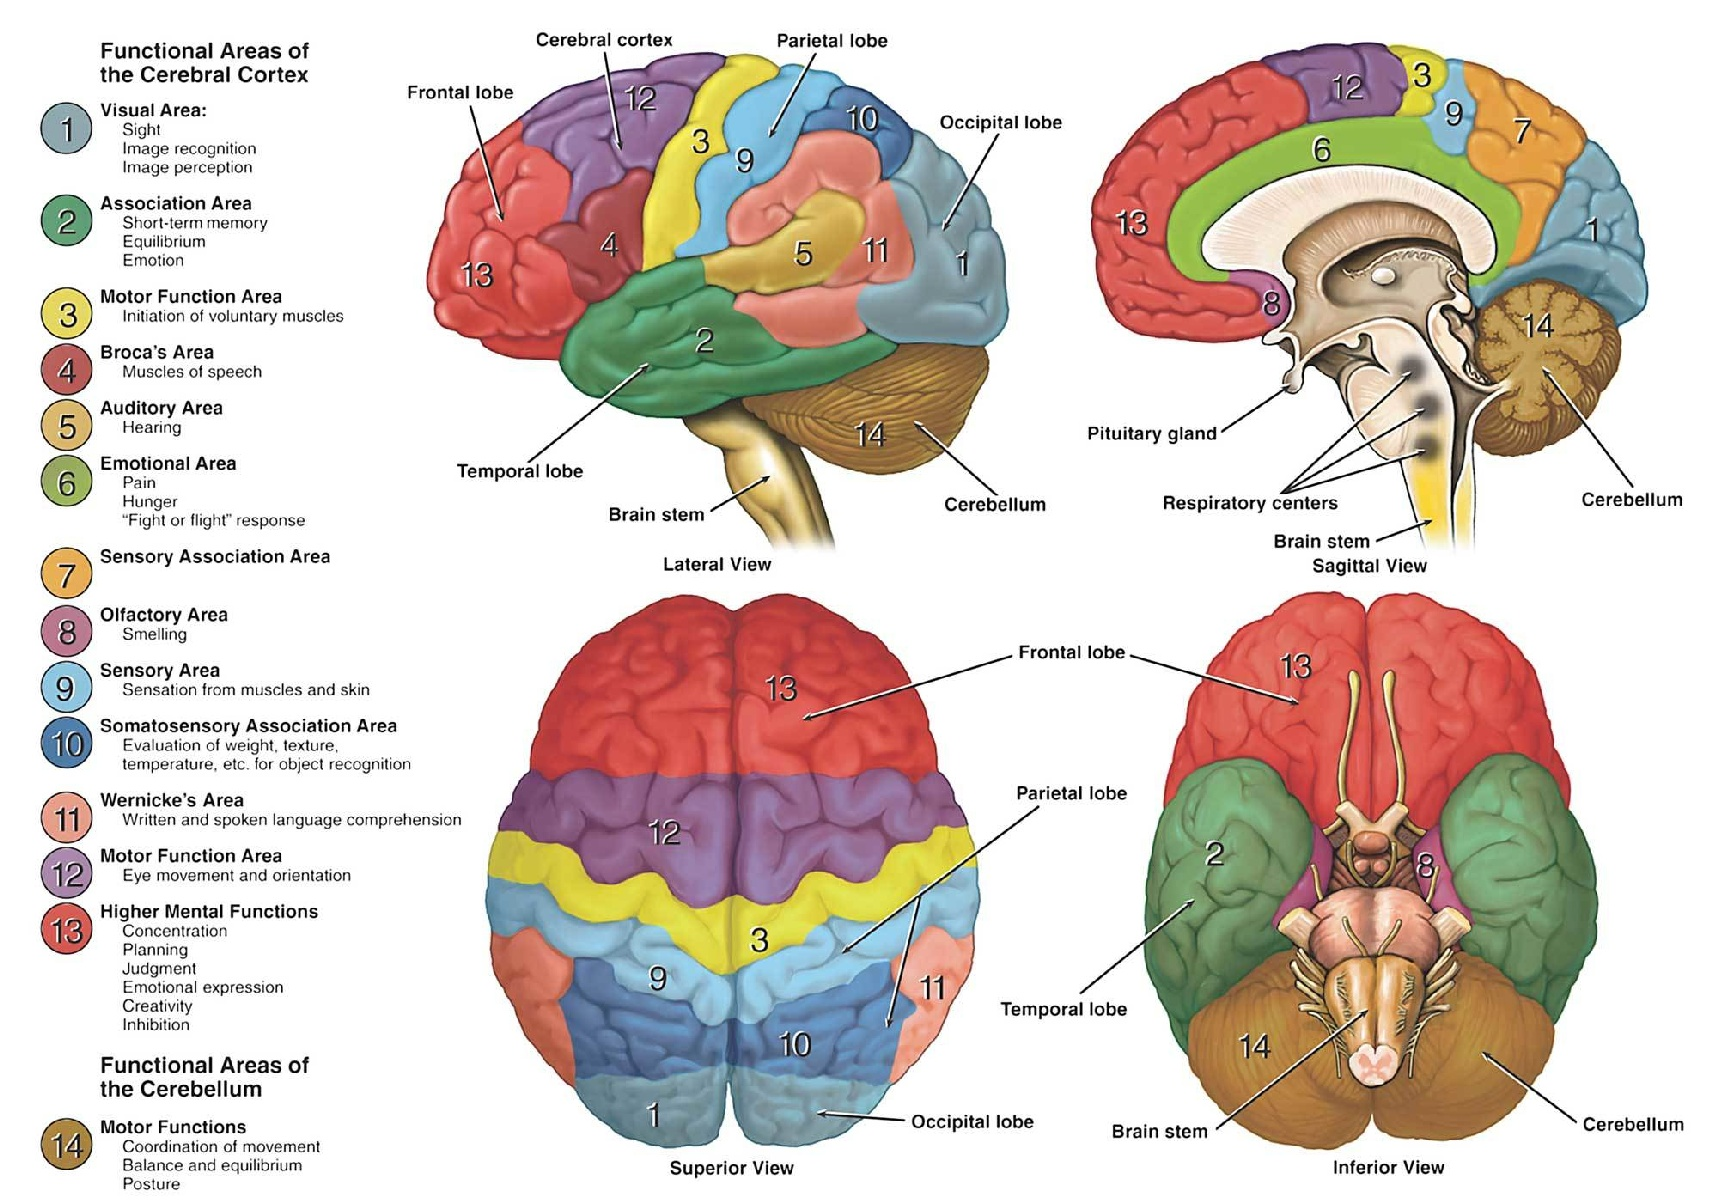

------
## Code here

Select a couple of voxels located in different regions of the brain and calcualate the correlation coefficient. How does it change?

In [186]:
## Code here

--------

The problem with the above approach is that you need to manually select each voxel and then run the correlation analysis. A quicker is to run a whole brain functional connectivity analysis, which essentially takes one voxel, called **seed** voxel and calculates the correlation between the seed and all the other voxels in the brain. 

To be able to do this, it is necessary to use three for loops, which you should have learnt as part of the primer material. The reason why we need three *for loops* is that we need to loop over all possible combinations of x, y and z coordinates. More in detail, we need to complete the following steps:

1. Create an all zero array with the same (x, y, z) shape of the fMRI data. We will use this array as a placeholder, and will replace the (x,y,z) value of the array with the correlation coefficient between the seed voxel and the voxel located in (x,y,z)
2. Identify the seed voxel (we will use here the voxel located in the visual cortex)
3. Loop over all x, y and z possible coordinates
4. Calculate the correlation between the (x,y,z) voxel and the seed voxel
5. Replace the 0 value of the all zero array with the correlation coefficient

In [184]:
fmri.shape[0:3]

(16, 16, 16)

In [218]:
seed_voxel = fmri[10,3,9,:]
FunctionalConnectivityResults = np.zeros(fmri.shape[0:3])
for x in range(fmri.shape[0]):
    for y in range(fmri.shape[1]):
        for z in range(fmri.shape[2]):
            new_voxel = fmri[x,y,z,:]
            corr_voxels = np.corrcoef(seed_voxel, new_voxel)[0][1]
            FunctionalConnectivityResults[x,y,z] = corr_voxels

Now, **FunctionalConnectivityResults** contains all the correlation coefficients between the seed voxels and the other voxels. To visualize them you can print them or plot them.

In [212]:
FunctionalConnectivityResults[2,10, 9]

0.6188145074545617

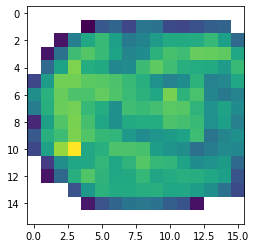

In [213]:
plt.imshow(FunctionalConnectivityResults[:,:, 9])

Try to check the correlation coefficient value in the seed voxel coordinates. Why do you think it is like that?

Now try to check the value at x=1, y=1, z=1

In [192]:
# CODE HERE


If you did it correctly, you should see that the value is **nan**. This nan corresponds to the white regions in the above figure, and to the areas in the image that are outside the brain (e.g. the background). We don't really need to calculate the correlation between the background and the seed voxel, because it just increases the amount of calculation that need to be computed, and the time required to compute them. This is a big waste of computational resources, mainly when running more complex analysis, rather than a simple correlation. 

In order to avoid running calculations that are not needed, we can use the information contained in the *brain mask*. The brain mask is a separate image that specifies which part of the fMRI images belong to the brain, and which parts to the background. To do that, it assigns a value of 1 to the brain regions, and a value of 0 to the background regions. Let's import the brain mask to see how it looks.

In [200]:
with open('Data/brainmask.pickle', 'rb') as handle:
    mask = pickle.load(handle)

In [201]:
mask.shape

(16, 16, 16)

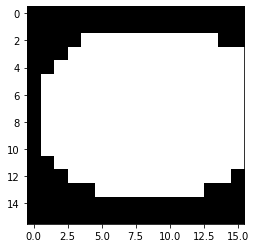

In [207]:
plt.imshow(mask[:, :, 9], cmap = "bone")

As you can see the (x, y, z) shape of the mask is equivalent to the (x, y, z) shape of the fMRI image. If you plot it, you can see in white the parts that belong to the brain, and in black those that belong to the background. In order to use the information contained in this mask, we can ass an additional if statement that specifies that the correlation should be computed **ONLY** if the (x,y,z) value in the mask is equal to 1.

In [214]:
seed_voxel = fmri[10,3,9,:]
FunctionalConnectivityResults = np.zeros(fmri.shape[0:3])
for x in range(fmri.shape[0]):
    for y in range(fmri.shape[1]):
        for z in range(fmri.shape[2]):
            if mask[x, y, z] == 1:
                new_voxel = fmri[x,y,z,:]
                corr_voxels = np.corrcoef(seed_voxel, new_voxel)[0][1]
                FunctionalConnectivityResults[x,y,z] = corr_voxels

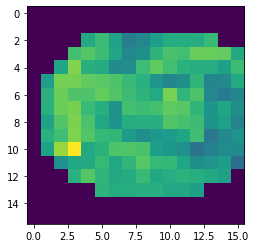

In [215]:
plt.imshow(FunctionalConnectivityResults[:,:, 9])

In [217]:
FunctionalConnectivityResults[1,1, 1]

0.0

Now, as you can see, the value in the background regions is equal to 0, which means that the original 0 value was not updated, since no correlation was computed.

## Whole brain regression analysis

A more advanced alternative to whole brain functional connectivity analysis is **whole brain regression analysis**. 